# Saturation Curves

* In this example plotting % of sequence file subsampled vs # of genes that had 10 or more reads
* other info I want is the total number of reads alinged to bacterial genome for each sample


In [172]:
import matplotlib.ticker as mtick
import sys
sys.path.append('/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods')
from settings import *
import helpers
%matplotlib inline
config_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/supplement/config"
config_dict = helpers.process_config(config_file)

# Output
figures_dir = config_dict["saturation_curves"]["figures"]
results_dir = config_dict["saturation_curves"]["results"]


# Flagstat summary 
flag_file = config_dict["flagstat"]["summary"]


# Strain Info
strain_info = pd.read_csv(strain_info_file, index_col=0)
strains = config_dict["strains"]["all"].split()
good_strains = config_dict["strains"]["good"].split()
not_good_strains = config_dict["strains"]["not_good"].split()

/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods/helpers.py


In [173]:
# My script did not work exactly like anticipated, the file that was written last
# Will have all the counts for all the runs (HM66_UTI)
csv_file = os.path.join(results_dir, "HM66_UTI_saturation_curve_data.csv")
df = pd.read_csv(csv_file, index_col=0)
df.index = [float(f.split("%")[0]) for f in df.index]
print(df.head())

      HM56_UR  HM56_UTI  HM14_UR  HM14_UTI  HM43_UR  HM43_UTI  HM54_UR  \
0.1     346.2     250.6    425.0     220.8    363.4     144.2    417.0   
0.5    1312.6     968.8   1654.2     882.8   1457.2     642.2   1566.0   
1.0    2040.4    1511.6   2418.2    1419.8   2215.2    1100.2   2340.0   
5.0    3668.2    2897.2   3946.2    2797.4   3716.4    2594.6   4111.8   
10.0   4166.0    3514.4   4415.2    3372.6   4190.2    3215.6   4749.0   

      HM54_UTI  HM86_UR  HM86_UTI    ...     HM57_UR  HM57_UTI  HM17_UR  \
0.1      110.4    281.6     119.0    ...       376.4      10.6    387.2   
0.5      543.2   1270.2     554.4    ...      1483.0      78.8   1525.2   
1.0      981.6   1993.6     965.2    ...      2247.8     152.0   2304.0   
5.0     2483.2   3772.2    2390.2    ...      3844.6     737.8   3891.8   
10.0    3223.4   4353.4    3009.4    ...      4340.2    1348.8   4388.4   

      HM17_UTI  HM07_UR  HM07_UTI  HM60_UR  HM60_UTI  HM66_UR  HM66_UTI  
0.1       30.4    434.8      3

In [174]:
def plot_saturation_curve_percent(sc_df, strain):  # ex."HM01"
        cols_to_plot = [c for c in list(sc_df.columns) if strain in c]
        
        print("Plotting: {}".format(cols_to_plot))
        fig = plt.figure(figsize=(10,8))
        legend_label = []
        for cp, c  in zip(cols_to_plot, clrs):
            cond = ur if cp.split("_")[1] == 'UR' else uti
            legend_label.append(sample_label(strain, cond))
            plt.plot(sc_df[cp], c)
        plt.ylabel("# of genes with 10 or more reads", fontsize=14)
        plt.xlabel ("% of reads subsampled", fontsize=14)
        plt.yticks(fontsize=16)
        plt.xticks(fontsize=14, rotation =70)
        plt.legend(legend_label, fontsize=16)
        return fig

Plotting: ['HM03_UR', 'HM03_UTI']


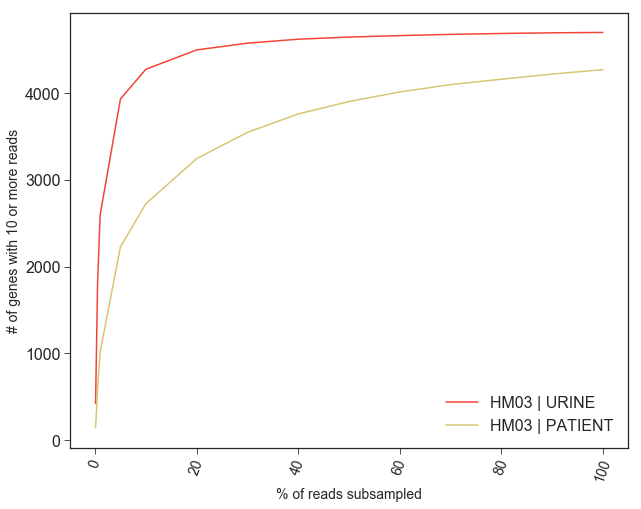

In [177]:
sns.set_style("ticks")
f = plot_saturation_curve_percent(df, "HM03")
# This is not really informative

* Now want to see if there's a relationship between how many reads aligned, and level at which samples plateau 

In [178]:
fdf = pd.read_csv(flag_file, index_col=0)
fdf = fdf[fdf["attr"].isnull()]
fdf.index = [f.split("_trimmed")[0] for f in fdf.index]
fdf.head()

,genome,sample,attr,total_reads,mapped,percent_mapped
HM01_UR,HM01,UR,NaN,17288419,16480326,0.953258
HM01_UTI,HM01,UTI,NaN,18496607,3717040,0.200958
HM03_UR,HM03,UR,NaN,21354719,20927541,0.979996
HM03_UTI,HM03,UTI,NaN,16544044,8059076,0.487129
HM06_UR,HM06,UR,NaN,23359847,22847374,0.978062


In [179]:
def plot_saturation_curve_reads(sc_df, flag_df, strain):   
    cols_to_plot = [c for c in sc_df.columns if strain in c]
    reads_mapped = [flag_df.mapped[c] for c in cols_to_plot]
    legend_label = []
    for rm, cp, c in zip(reads_mapped, cols_to_plot, [col5, col1]):
        cond = ur if cp.split("_")[1] == 'UR' else uti
        plt.plot(rm*(sc_df.index)/100, sc_df[cp], c, linewidth=3)
        legend_label.append(sample_label(strain, cond))
    plt.ylabel("# of genes with 10 or more reads", fontsize=14)
    plt.xlabel ("# of reads subsampled", fontsize=14)
    plt.legend(legend_label, loc=4, fontsize=16)
    plt.locator_params(axis = 'x', nbins = 5)
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    plt.xlim(-1000000, 2.5*10**7)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)

In [180]:
strains_good_to_bad = sorted(good_strains) + sorted(not_good_strains)

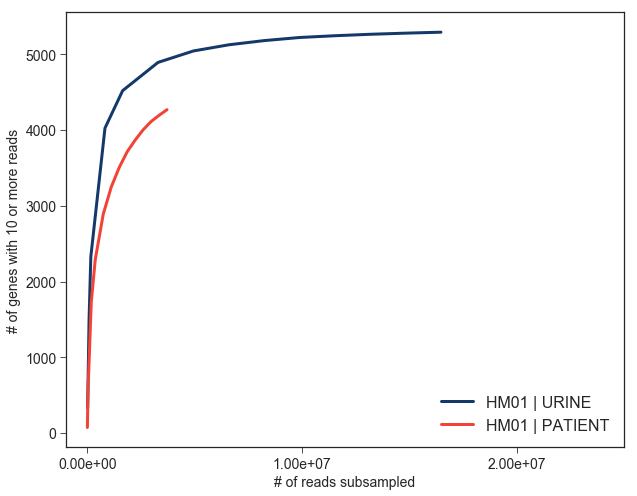

In [181]:
f = plt.figure(figsize=(10,8))
plot_saturation_curve_reads(df, fdf, 'HM01')

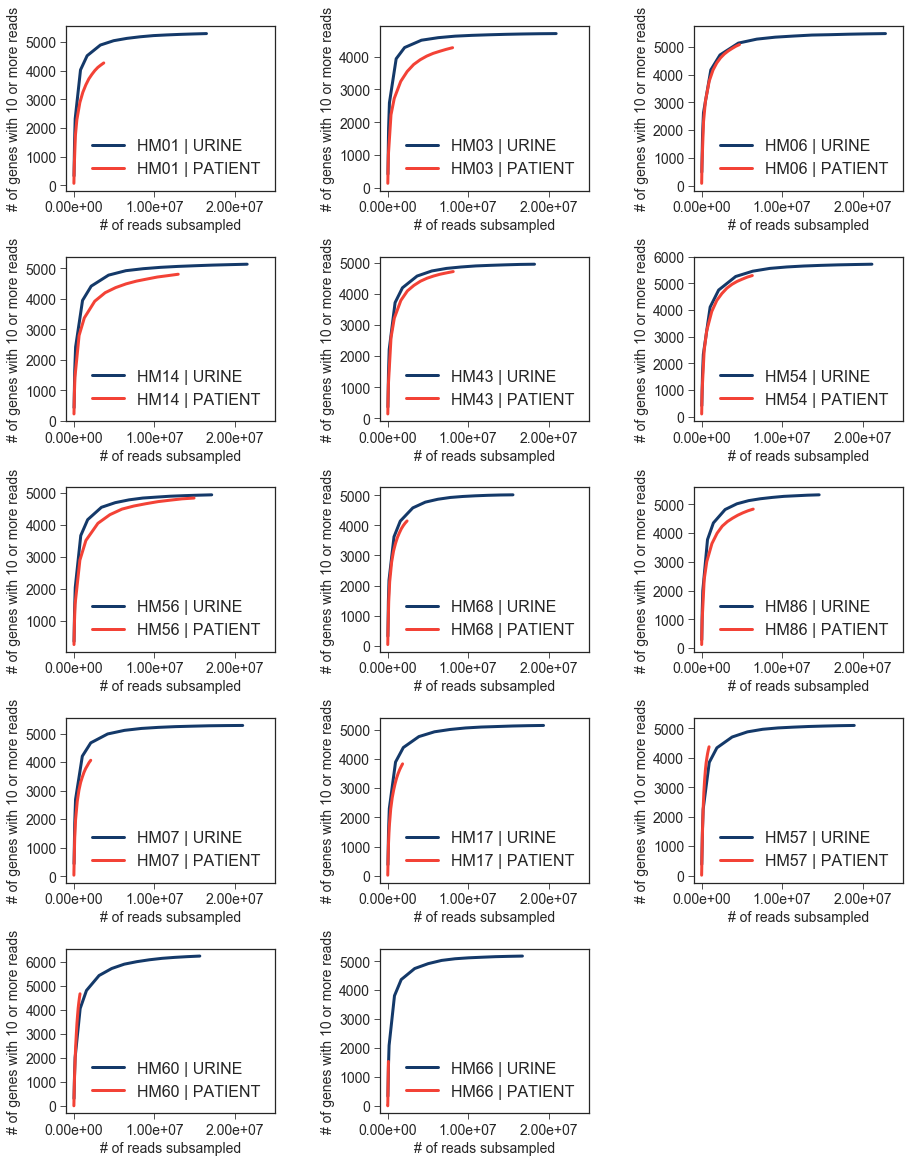

In [182]:
fig = plt.figure(figsize=(15, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
for i, s  in enumerate(strains_good_to_bad):  
    ax = fig.add_subplot(5, 3, i+1)
    plot_saturation_curve_reads(df, fdf, s)
fn = os.path.join(figures_dir, "Supplementary_figure_1.png")
fig.savefig(fn, dpi=300, bbox_inches="tight")